# CIFAR100 - Categorical Classification
> # Convolutional Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* import Tensorflow

In [ ]:
import tensorflow

tensorflow.__version__

'2.8.0'

# I. CIFAR100 Data_Set Load

In [ ]:
from tensorflow.keras.datasets import cifar100

(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode = 'fine')

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [ ]:
X_train = X_train.reshape((50000,  32, 32, 3))
X_test = X_test.reshape((10000,  32, 32, 3))

* Normalization

In [ ]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

> ## 2) One Hot Encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# III. Import ResNet50V2 Model

> ## 1) conv_base

In [ ]:
from tensorflow.keras.applications import ResNet50V2

conv_base = ResNet50V2(weights = 'imagenet',
                      include_top = False,
                      input_shape = (32, 32, 3))

# IV. Keras Modeling

> ## 1) Model Define

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 1, 1, 2048)        23564800  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               524544    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               25700     
                                                                 
Total params: 24,115,044
Trainable params: 24,069,604
Non-trainable params: 45,440
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 50분

In [ ]:
%%time

Hist_mnist = model.fit(X_train, y_train,
                       epochs = 60,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/60
313/313 [==============================] - 55s 156ms/step - loss: 4.4827 - accuracy: 0.0276 - val_loss: 4.3494 - val_accuracy: 0.0352
Epoch 2/60
313/313 [==============================] - 50s 159ms/step - loss: 4.0609 - accuracy: 0.0649 - val_loss: 4.0751 - val_accuracy: 0.0675
Epoch 3/60
313/313 [==============================] - 47s 151ms/step - loss: 3.8182 - accuracy: 0.0882 - val_loss: 4.3222 - val_accuracy: 0.0456
Epoch 4/60
313/313 [==============================] - 47s 151ms/step - loss: 3.7198 - accuracy: 0.1028 - val_loss: 4.2906 - val_accuracy: 0.0866
Epoch 5/60
313/313 [==============================] - 47s 150ms/step - loss: 3.4902 - accuracy: 0.1393 - val_loss: 3.5462 - val_accuracy: 0.1317
Epoch 6/60
313/313 [==============================] - 50s 159ms/step - loss: 3.3486 - accuracy: 0.1644 - val_loss: 3.4764 - val_accuracy: 0.1582
Epoch 7/60
313/313 [==============================] - 47s 151ms/step - loss: 3.3768 - accuracy: 0.1676 - val_loss: 3.5001 - val_ac

> ## 4) 학습 결과 시각화

* Loss Visualization

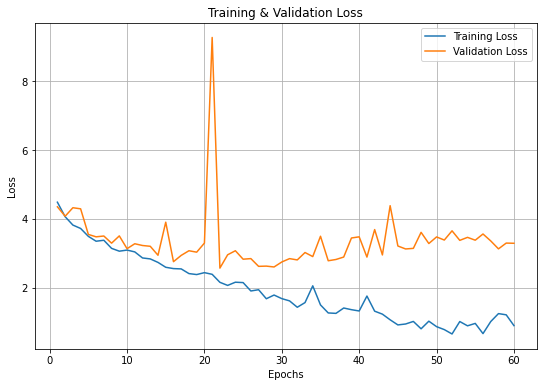

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 9s 27ms/step - loss: 3.2345 - accuracy: 0.4147
Loss = 3.23449
Accuracy = 0.41470


# 
# 
# 
# The End
# 
# 
# 